In [2]:
!ls

PCA.ipynb  USArrests.csv


In [5]:
# loading data
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("USArrests.csv")
df.shape
# df_raw.head()

# plots = 20
# df = df_raw.iloc[:, 0:plots]

display(df.describe())
display(df.head())
display(df.columns)

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

scaled_df shape:  (50, 4)


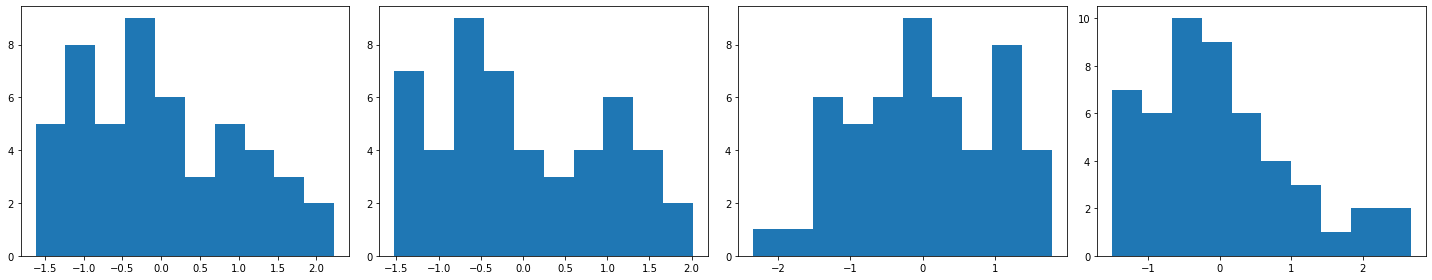

In [28]:
# Data preprocessing
from sklearn.preprocessing import scale
import numpy as np

# Center in 0
scaled_df = scale(df.iloc[:, 1:])
print("scaled_df shape: ", scaled_df.shape)
# plot distribution
fig, ax = plt.subplots( 1, 4, tight_layout = True, figsize = (20, 4))
for i in range(4):
    
    ax[i].hist(scaled_df[:, i])

In [80]:
from numpy import linalg

# getting cov matrix
# cov = np.cov(scaled_df)
C = np.dot(scaled_df.T, scaled_df) / (50-1)

# print(C.shape)
# print("cov matrix: \n", C)
# getting eigen values and vectors
eig_values, eig_vectors = linalg.eig(C)
print(eig_vectors)
print(eig_values)
# Project X onto PC space
df_pca = np.dot(scaled_df, eig_vectors)
# print(df_pca)

[[ 0.53589947  0.41818087  0.6492278  -0.34123273]
 [ 0.58318363  0.1879856  -0.74340748 -0.26814843]
 [ 0.27819087 -0.87280619  0.13387773 -0.37801579]
 [ 0.54343209 -0.16731864  0.08902432  0.81777791]]
[2.53085875 1.00996444 0.17696948 0.36383998]


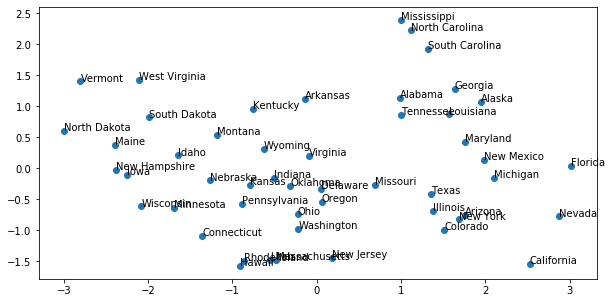

In [76]:
# Plot PCs
fig, ax = plt.subplots(figsize = (10,5))
ax.scatter(df_pca[:,0], df_pca[:, 1], label = df.iloc[:, 0])
for i, txt in enumerate(df.iloc[:, 0]):
#     print(i)
    ax.annotate(txt, (df_pca[i,0], df_pca[i,1]))

Explained variance:  [0.62006039 0.24744129 0.04335752 0.0891408 ]
Explained variance with first 2 PC:  0.8675016829223335  %


<BarContainer object of 4 artists>

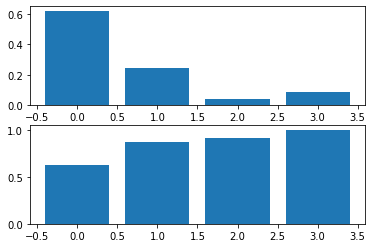

In [95]:
# Computing PVE
PVEs = eig_values/np.sum(eig_values)
print("Explained variance: ", PVEs)
print("Explained variance with first 2 PC: ", PVEs[0] + PVEs[1], " %")

fig, ax = plt.subplots(2, 1)
ax[0].bar(np.arange(0, 4), PVEs)
ax[1].bar(np.arange(0, 4), np.cumsum(PVEs))

## Ejercicio 2:
En este ejemplo, ¿cuál es el número óptimo de componentes principales?

¿Buscar algun criterio?

In [111]:
# loading data
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("USArrests.csv")
df.shape

(50, 5)

In [112]:
# Using built-in functions

from sklearn.preprocessing import StandardScaler

df = df.iloc[:, 1:]
df = StandardScaler().fit_transform(df)

In [113]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(df)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

/home/leo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

NameError: name 'finalDf' is not defined

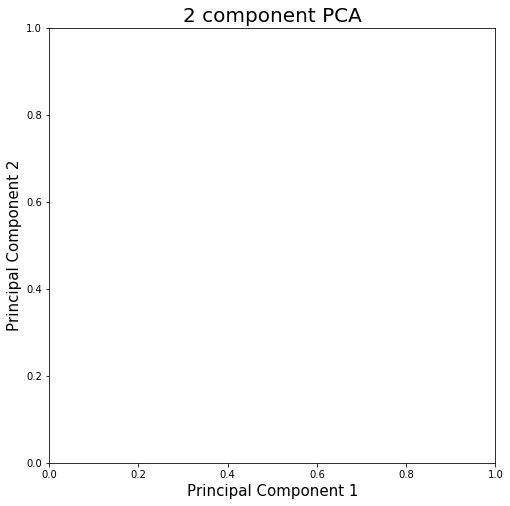

In [114]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()